In [9]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load csv file into dataframe
df1 = pd.read_csv('leads_basic_details.csv')
df2 = pd.read_csv('sales_managers_assigned_leads_details.csv')
df3 = pd.read_csv('leads_interaction_details.csv')
df4 = pd.read_csv('leads_demo_watched_details.csv')
df5 = pd.read_csv('leads_reasons_for_no_interest.csv')

## leads_basic_details 

In [4]:
df1.head()

,lead_id,age,gender,current_city,current_education,parent_occupation,lead_gen_source
0,USR1001,16,FEMALE,Hyderabad,Intermediate,Private Employee,social_media
1,USR1002,20,MALE,Bengaluru,B.Tech,Business,user_referrals
2,USR1003,20,FEMALE,Visakhapatnam,B.Tech,Lawyer,user_referrals
3,USR1004,16,MALE,Mumbai,Intermediate,IT Employee,user_referrals
4,USR1005,16,MALE,Chennai,Intermediate,Government Employee,user_referrals


In [128]:
df1.shape

(360, 7)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   lead_id            360 non-null    object
 1   age                360 non-null    int64 
 2   gender             360 non-null    object
 3   current_city       360 non-null    object
 4   current_education  360 non-null    object
 5   parent_occupation  360 non-null    object
 6   lead_gen_source    360 non-null    object
dtypes: int64(1), object(6)
memory usage: 19.8+ KB


In [6]:
df1.isnull().sum()

lead_id              0
age                  0
gender               0
current_city         0
current_education    0
parent_occupation    0
lead_gen_source      0
dtype: int64

In [7]:
df1.describe()

,age
count,360.000000
mean,21.561111
std,11.555444
min,16.000000
25%,18.000000
50%,21.000000
75%,24.000000
max,211.000000


In [8]:
df1.nunique()

lead_id              360
age                    9
gender                 2
current_city           6
current_education      6
parent_occupation      7
lead_gen_source        5
dtype: int64

C:\Users\daksh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\daksh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


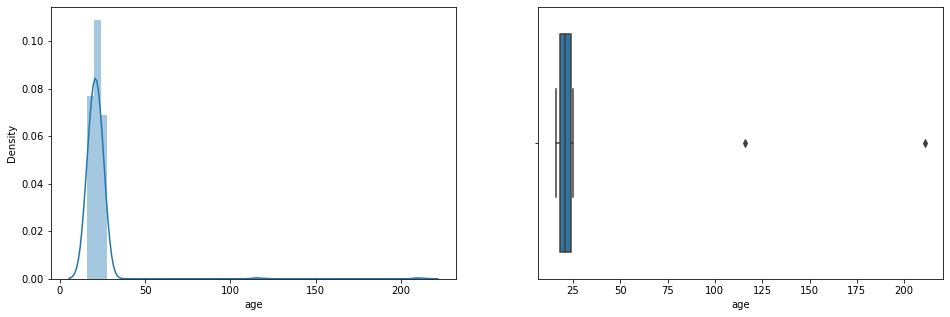

In [10]:
# Deal with outliers
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df1['age'])

plt.subplot(1,2,2)
sns.boxplot(df1['age'])

plt.show()


In [14]:
# Finding the IQR
q1 = df1['age'].quantile(0.25)
q3 = df1['age'].quantile(0.75)

In [15]:
print(q1)
print(q3)

18.0
24.0


In [16]:
iqr = q3 - q1
print(iqr)

6.0


In [17]:
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

In [18]:
print(upper_limit)
print(lower_limit)

33.0
9.0


In [19]:
# Finding_outliers
df1[df1['age'] > upper_limit]

,lead_id,age,gender,current_city,current_education,parent_occupation,lead_gen_source
17,USR1018,211,MALE,Hyderabad,Degree,IT Employee,social_media
300,USR1301,116,FEMALE,Hyderabad,Intermediate,Private Employee,social_media


In [20]:
df1[df1['age'] < lower_limit]

,lead_id,age,gender,current_city,current_education,parent_occupation,lead_gen_source


In [21]:
# Trimming outlier
new_df1 = df1[df1['age'] < upper_limit]

In [23]:
new_df1.shape

(358, 7)

## sales_managers_assigned_leads_details

In [24]:
df2.sample(5)

,snr_sm_id,jnr_sm_id,assigned_date,cycle,lead_id
124,SNR502MG,JNR1007MG,1/1/2022,1,USR1125
110,SNR502MG,JNR1006MG,1/15/2022,3,USR1111
357,SNR501MG,JNR1001MG,1/8/2022,2,USR1358
189,SNR503MG,JNR1010MG,1/8/2022,2,USR1190
33,SNR501MG,JNR1002MG,1/15/2022,3,USR1034


In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   snr_sm_id      360 non-null    object
 1   jnr_sm_id      360 non-null    object
 2   assigned_date  360 non-null    object
 3   cycle          360 non-null    int64 
 4   lead_id        360 non-null    object
dtypes: int64(1), object(4)
memory usage: 14.2+ KB


In [129]:
df2.shape

(360, 5)

In [26]:
df2.isnull().sum()

snr_sm_id        0
jnr_sm_id        0
assigned_date    0
cycle            0
lead_id          0
dtype: int64

In [27]:
df2.describe()

,cycle
count,360.000000
mean,2.469444
std,1.124139
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,4.000000


In [29]:
df2['assigned_date'] = pd.to_datetime(df2['assigned_date'])

In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   snr_sm_id      360 non-null    object        
 1   jnr_sm_id      360 non-null    object        
 2   assigned_date  360 non-null    datetime64[ns]
 3   cycle          360 non-null    int64         
 4   lead_id        360 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 14.2+ KB


In [88]:
df2.sample(10)

,snr_sm_id,jnr_sm_id,assigned_date,cycle,lead_id
58,SNR501MG,JNR1003MG,2022-02-19,4,USR1059
75,SNR501MG,JNR1004MG,2022-02-19,4,USR1076
299,SNR504MG,JNR1015MG,2022-02-19,4,USR1300
328,SNR504MG,JNR1016MG,2022-01-01,1,USR1329
298,SNR504MG,JNR1015MG,2022-02-19,4,USR1299
190,SNR503MG,JNR1010MG,2022-01-15,3,USR1191
281,SNR504MG,JNR1015MG,2022-01-01,1,USR1282
76,SNR501MG,JNR1004MG,2022-02-19,4,USR1077
206,SNR503MG,JNR1011MG,2022-01-08,2,USR1207
245,SNR504MG,JNR1013MG,2022-01-08,2,USR1246


In [90]:
df2['cycle'].unique()
# No null values

array([1, 2, 3, 4], dtype=int64)

## leads_interaction_details

In [92]:
df3.sample(5)

,jnr_sm_id,lead_id,lead_stage,call_done_date,call_status,call_reason
203,JNR1002MG,USR1037,awareness,2/23/2022,successful,followup_for_consideration
1156,JNR1010MG,USR1181,lead,1/1/2022,successful,lead_introduction
1616,JNR1013MG,USR1248,lead,1/10/2022,successful,demo_schedule
2155,JNR1011MG,USR1336,lead,1/1/2022,unsuccessful,lead_introduction
1335,JNR1011MG,USR1207,lead,1/12/2022,successful,demo_schedule


In [93]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   jnr_sm_id       2192 non-null   object
 1   lead_id         2192 non-null   object
 2   lead_stage      2192 non-null   object
 3   call_done_date  2192 non-null   object
 4   call_status     2192 non-null   object
 5   call_reason     2192 non-null   object
dtypes: object(6)
memory usage: 102.9+ KB


In [130]:
df3.shape

(2192, 6)

In [96]:
df3.isnull().sum()

jnr_sm_id         0
lead_id           0
lead_stage        0
call_done_date    0
call_status       0
call_reason       0
dtype: int64

In [94]:
df3['call_done_date'] = pd.to_datetime(df3['call_done_date'])

In [97]:
df3.nunique()

jnr_sm_id          16
lead_id           358
lead_stage          4
call_done_date     40
call_status         2
call_reason         8
dtype: int64

In [95]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   jnr_sm_id       2192 non-null   object        
 1   lead_id         2192 non-null   object        
 2   lead_stage      2192 non-null   object        
 3   call_done_date  2192 non-null   datetime64[ns]
 4   call_status     2192 non-null   object        
 5   call_reason     2192 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 102.9+ KB


In [99]:
df3.describe()

C:\Users\daksh\AppData\Local\Temp\ipykernel_28024\4162941808.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df3.describe()


,jnr_sm_id,lead_id,lead_stage,call_done_date,call_status,call_reason
count,2192,2192,2192,2192,2192,2192
unique,16,358,4,40,2,8
top,JNR1012MG,USR1193,lead,2022-01-08 00:00:00,successful,demo_not_attended
freq,164,11,1547,156,1866,701
first,NaN,NaN,NaN,2022-01-01 00:00:00,NaN,NaN
last,NaN,NaN,NaN,2022-03-01 00:00:00,NaN,NaN


## leads_demo_watched_details

In [98]:
df4.sample(5)

,lead_id,demo_watched_date,language,watched_percentage
5,USR1007,1/11/2022,English,52
50,USR1055,1/18/2022,English,70
137,USR1222,1/6/2022,English,25
121,USR1191,1/17/2022,Telugu,85
156,USR1257,2/25/2022,English,19


In [114]:
df4.shape

(194, 4)

In [100]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   lead_id             194 non-null    object
 1   demo_watched_date   194 non-null    object
 2   language            194 non-null    object
 3   watched_percentage  194 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.2+ KB


In [101]:
df4.isnull().sum()

lead_id               0
demo_watched_date     0
language              0
watched_percentage    0
dtype: int64

In [102]:
df4.describe()

,watched_percentage
count,194.000000
mean,56.634021
std,43.555635
min,2.000000
25%,35.000000
50%,55.500000
75%,75.750000
max,510.000000


In [103]:
df4['demo_watched_date'] = pd.to_datetime(df4['demo_watched_date'])

In [104]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   lead_id             194 non-null    object        
 1   demo_watched_date   194 non-null    datetime64[ns]
 2   language            194 non-null    object        
 3   watched_percentage  194 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 6.2+ KB


C:\Users\daksh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\daksh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


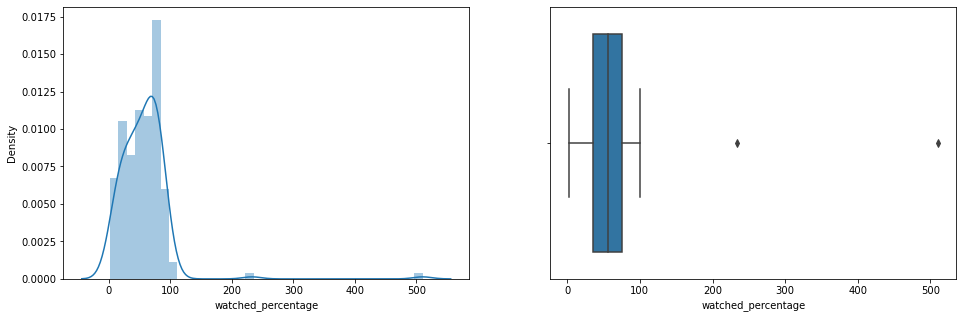

In [105]:
# Deal with outliers
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df4['watched_percentage'])

plt.subplot(1,2,2)
sns.boxplot(df4['watched_percentage'])

plt.show()


In [106]:
# Remove outlier
# Finding the IQR
q1 = df4['watched_percentage'].quantile(0.25)
q3 = df4['watched_percentage'].quantile(0.75)

In [107]:
print(q1)
print(q3)

35.0
75.75


In [108]:
iqr = q3 - q1
print(iqr)

40.75


In [109]:
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

In [110]:
print(upper_limit)
print(lower_limit)

136.875
-26.125


In [111]:
# Finding_outliers
df4[df4['watched_percentage'] > upper_limit]

,lead_id,demo_watched_date,language,watched_percentage
94,USR1138,2022-02-20,English,510
133,USR1213,2022-01-20,Telugu,233


In [112]:
# trim outliers
new_df4 = df4[df4['watched_percentage'] < upper_limit]

In [113]:
new_df4.shape

(192, 4)

## leads_reasons_for_no_interest

In [115]:
df5.sample(10)

,lead_id,reasons_for_not_interested_in_demo,reasons_for_not_interested_to_consider,reasons_for_not_interested_to_convert
163,USR1206,Student not interested in domain,NaN,NaN
271,USR1338,Wants offline classes,NaN,NaN
259,USR1326,Wants offline classes,NaN,NaN
46,USR1068,No time for student,NaN,NaN
3,USR1005,NaN,Can't afford,NaN
133,USR1170,NaN,Student not interested in domain,NaN
40,USR1060,No time for student,NaN,NaN
47,USR1069,Can't afford,NaN,NaN
178,USR1225,NaN,NaN,Can't afford
162,USR1205,Can't afford,NaN,NaN


In [118]:
df5.shape

(294, 4)

In [116]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 4 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   lead_id                                 294 non-null    object
 1   reasons_for_not_interested_in_demo      164 non-null    object
 2   reasons_for_not_interested_to_consider  79 non-null     object
 3   reasons_for_not_interested_to_convert   51 non-null     object
dtypes: object(4)
memory usage: 9.3+ KB


In [126]:
df5.describe()

,lead_id,reasons_for_not_interested_in_demo,reasons_for_not_interested_to_consider,reasons_for_not_interested_to_convert
count,294,164,79,51
unique,294,6,5,5
top,USR1001,Wants offline classes,Can't afford,Can't afford
freq,1,56,32,19


In [127]:
df5.isnull().sum()

lead_id                                     0
reasons_for_not_interested_in_demo        130
reasons_for_not_interested_to_consider    215
reasons_for_not_interested_to_convert     243
dtype: int64

## Remove Outlier data from all tables. 
### based on unique lead_id


In [136]:
# From 2nd table
indexAge = df2[ (df2['lead_id'] == 'USR1018') | (df2['lead_id'] == 'USR1301') | (df2['lead_id'] == 'USR1138') | (df2['lead_id'] == 'USR1213')].index
df2_new = df2.drop(indexAge)
indexAge

Int64Index([17, 137, 212, 300], dtype='int64')

In [137]:
df2_new.shape

(356, 5)

In [138]:
# From 3rd table
indexAge = df3[ (df3['lead_id'] == 'USR1018') | (df3['lead_id'] == 'USR1301') | (df3['lead_id'] == 'USR1138') | (df3['lead_id'] == 'USR1213')].index
df3_new = df3.drop(indexAge)
indexAge

Int64Index([  93,   94,   95,   96,   97,  869,  870,  871,  872,  873,  874,
             875, 1376, 1377, 1378, 1379, 1380, 1381, 1382, 1383, 1384, 1385,
            1386, 1966, 1967, 1968, 1969, 1970, 1971],
           dtype='int64')

In [139]:
df3_new.shape

(2163, 6)

In [140]:
# From 5th table
indexAge = df5[ (df5['lead_id'] == 'USR1018') | (df5['lead_id'] == 'USR1301') | (df5['lead_id'] == 'USR1138') | (df5['lead_id'] == 'USR1213')].index
df5_new = df5.drop(indexAge)
indexAge

Int64Index([11, 105, 242], dtype='int64')

In [141]:
df5_new.shape

(291, 4)

In [142]:
# From 1st table
indexAge = df1[ (df1['lead_id'] == 'USR1018') | (df1['lead_id'] == 'USR1301') | (df1['lead_id'] == 'USR1138') | (df1['lead_id'] == 'USR1213')].index
df1_new = df1.drop(indexAge)
indexAge

Int64Index([17, 137, 212, 300], dtype='int64')

In [143]:
df1_new.shape

(356, 7)

In [144]:
# From 4th table
indexAge = df4[ (df4['lead_id'] == 'USR1018') | (df4['lead_id'] == 'USR1301') | (df4['lead_id'] == 'USR1138') | (df4['lead_id'] == 'USR1213')].index
df4_new = df4.drop(indexAge)
indexAge

Int64Index([16, 94, 133], dtype='int64')

In [145]:
df4_new.shape

(191, 4)

## Convert cleaned dataframe into csv file for further analysis

In [146]:
df1_new.to_csv('leads_basic_details1.csv')
df2_new.to_csv('sales_managers_assigned_leads_details1.csv')
df3_new.to_csv('leads_interaction_details1.csv')
df4_new.to_csv('leads_demo_watched_details1.csv')
df5_new.to_csv('leads_reasons_for_no_interest1.csv')